In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
Pkg.add(url="https://github.com/madeleineudell/LowRankModels.jl")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...


No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
   Updating git-repo `https://github.com/madeleineudell/LowRankModels.jl`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots
using LowRankModels

In [4]:
include("../demos/proxgrad.jl")

proxgrad_const

In [5]:
df = CSV.read("national.csv")

217340×311 DataFrame. Omitted printing of 309 columns
│ Row    │ sitecode │ sitename                                           │
│        │ String   │ String                                             │
├────────┼──────────┼────────────────────────────────────────────────────┤
│ 1      │ XX       │ United States (XX)                                 │
│ 2      │ XX       │ United States (XX)                                 │
│ 3      │ XX       │ United States (XX)                                 │
│ 4      │ XX       │ United States (XX)                                 │
│ 5      │ XX       │ United States (XX)                                 │
│ 6      │ XX       │ United States (XX)                                 │
│ 7      │ XX       │ United States (XX)                                 │
│ 8      │ XX       │ United States (XX)                                 │
│ 9      │ XX       │ United States (XX)                                 │
│ 10     │ XX       │ United States (XX)                                 │
⋮
│ 217330 │ XX       │ United States (XX)                                 │
│ 217331 │ XX       │ United States (XX)                                 │
│ 217332 │ XX       │ United States (XX)                                 │
│ 217333 │ XX       │ United States (XX)                                 │
│ 217334 │ XX       │ United States (XX)                                 │
│ 217335 │ XX       │ United States (XX)                                 │
│ 217336 │ XX       │ United States (XX)                                 │
│ 217337 │ XX       │ United States (XX)                                 │
│ 217338 │ XX       │ United States (XX)                                 │
│ 217339 │ XX       │ United States (XX)                                 │
│ 217340 │ XX       │ United States (XX)                                 │

In [6]:
df = select!(df, Not(:sitename))
df = select!(df, Not(:sitetype))
df = select!(df, Not(:sitetypenum))
df = select!(df, Not(:survyear))
df = select!(df, Not(:weight))
df = select!(df, Not(:stratum))
df = select!(df, Not(:PSU))
df = select!(df, Not(:record))

217340×303 DataFrame. Omitted printing of 296 columns
│ Row    │ sitecode │ year  │ age    │ sex    │ grade  │ race4  │ race7  │
│        │ String   │ Int64 │ String │ String │ String │ String │ String │
├────────┼──────────┼───────┼────────┼────────┼────────┼────────┼────────┤
│ 1      │ XX       │ 1991  │ NA     │ NA     │ 1      │ 3      │ 4      │
│ 2      │ XX       │ 1991  │ NA     │ NA     │ NA     │ NA     │ NA     │
│ 3      │ XX       │ 1991  │ 4      │ NA     │ 2      │ 1      │ 6      │
│ 4      │ XX       │ 1991  │ 5      │ NA     │ 2      │ 1      │ 6      │
│ 5      │ XX       │ 1991  │ 6      │ NA     │ NA     │ 4      │ NA     │
│ 6      │ XX       │ 1991  │ NA     │ 2      │ 4      │ 3      │ 4      │
│ 7      │ XX       │ 1991  │ NA     │ 2      │ 4      │ 3      │ 4      │
│ 8      │ XX       │ 1991  │ 1      │ 2      │ NA     │ 4      │ NA     │
│ 9      │ XX       │ 1991  │ 1      │ 2      │ 3      │ 1      │ 6      │
│ 10     │ XX       │ 1991  │ 1      │ 2      │ 2      │ 4      │ NA     │
⋮
│ 217330 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 3      │ 4      │
│ 217331 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217332 │ XX       │ 2019  │ 7      │ 1      │ 3      │ 2      │ 3      │
│ 217333 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217334 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217335 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217336 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217337 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217338 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217339 │ XX       │ 2019  │ 7      │ 1      │ 3      │ NA     │ NA     │
│ 217340 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 2      │ 3      │

In [7]:
keep = df[:age].!="NA"
r_df = df[keep, :]
keep = r_df[:grade].!="NA"
r_df = r_df[keep, :]
keep = r_df[:sex].!="NA"
r_df = r_df[keep, :]
keep = r_df[:q41].!=" "
r_df = r_df[keep, :]

199642×303 DataFrame. Omitted printing of 296 columns
│ Row    │ sitecode │ year  │ age    │ sex    │ grade  │ race4  │ race7  │
│        │ String   │ Int64 │ String │ String │ String │ String │ String │
├────────┼──────────┼───────┼────────┼────────┼────────┼────────┼────────┤
│ 1      │ XX       │ 1991  │ 1      │ 2      │ 2      │ 4      │ NA     │
│ 2      │ XX       │ 1991  │ 1      │ 2      │ 1      │ 4      │ 2      │
│ 3      │ XX       │ 1991  │ 1      │ 2      │ 2      │ 3      │ 4      │
│ 4      │ XX       │ 1991  │ 1      │ 2      │ 1      │ 4      │ NA     │
│ 5      │ XX       │ 1991  │ 2      │ 2      │ 1      │ 2      │ 3      │
│ 6      │ XX       │ 1991  │ 2      │ 2      │ 1      │ 1      │ 6      │
│ 7      │ XX       │ 1991  │ 2      │ 2      │ 1      │ 2      │ 3      │
│ 8      │ XX       │ 1991  │ 3      │ 2      │ 1      │ 3      │ 4      │
│ 9      │ XX       │ 1991  │ 3      │ 2      │ 1      │ 1      │ 6      │
│ 10     │ XX       │ 1991  │ 3      │ 2      │ 1      │ 2      │ 3      │
⋮
│ 199632 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 3      │ 4      │
│ 199633 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199634 │ XX       │ 2019  │ 7      │ 1      │ 3      │ 2      │ 3      │
│ 199635 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199636 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199637 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199638 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199639 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199640 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199641 │ XX       │ 2019  │ 7      │ 1      │ 3      │ NA     │ NA     │
│ 199642 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 2      │ 3      │

In [8]:
r_df = r_df[shuffle(1:end), :]
train_proportion = 0.6
val_proportion = 0.2
n = size(r_df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))
nval = convert(Int, round(val_proportion*n))

target = r_df[:, :q41]
data = r_df[:, filter(col -> (col != :q41), names(r_df))]

#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
val_x = data[ntrain+1:ntrain+nval,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+nval+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
val_y = target[ntrain+1:ntrain+nval,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+nval+1:n,:]

Size of dataset: 199642


39929×1 Array{String,2}:
 "2"
 "1"
 "3"
 "3"
 "3"
 "1"
 "1"
 "1"
 "4"
 "2"
 "4"
 "6"
 "3"
 ⋮
 "2"
 "1"
 "3"
 "1"
 "1"
 "2"
 "1"
 "3"
 "2"
 "1"
 "3"
 "1"

In [9]:
println(size(train_x))
println(size(train_y))
println(size(test_x))
println(size(test_y))
println(size(val_x))
println(size(val_y))

(119785, 303)
(119785, 1)
(39929, 303)
(39929, 1)
(39928, 303)
(39928, 1)


In [10]:
"This function converts strings to int values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_int(str)
    try
        parse(Int, str)
    catch
       0.0
    end
end

string_to_int

In [11]:
"This function converts strings to floating point values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       0.0
    end
end

string_to_float

In [12]:
function ages(df)
    for i = 1:size(df,1)
        if df[i, :age] == "1"
            df[i, :age] = "12"
        elseif df[i, :age] == "2"
            df[i, :age] = "13"
        elseif df[i, :age] == "3"
            df[i, :age] = "14"
        elseif df[i, :age] == "4"
            df[i, :age] = "15"
        elseif df[i, :age] == "5"
            df[i, :age] = "16"
        elseif df[i, :age] == "6"
            df[i, :age] = "17"           
        elseif df[i, :age] == "7"
            df[i, :age] = "18"
        end
    end
    df[:age] = string_to_int.(df[:age])
    return df
end

ages (generic function with 1 method)

In [868]:
train_x1 = ages(train_x)
test_x1 = ages(test_x)
val_x1 = ages(val_x)

39928×303 DataFrame. Omitted printing of 296 columns
│ Row   │ sitecode │ year  │ age     │ sex    │ grade  │ race4  │ race7  │
│       │ String   │ Int64 │ Float64 │ String │ String │ String │ String │
├───────┼──────────┼───────┼─────────┼────────┼────────┼────────┼────────┤
│ 1     │ XX       │ 2015  │ 0.0     │ 2      │ 2      │ 1      │ 6      │
│ 2     │ XX       │ 2015  │ 0.0     │ 1      │ 2      │ 3      │ 4      │
│ 3     │ XX       │ 2003  │ 0.0     │ 2      │ 3      │ 1      │ 6      │
│ 4     │ XX       │ 2005  │ 0.0     │ 2      │ 2      │ 2      │ 3      │
│ 5     │ XX       │ 2009  │ 0.0     │ 1      │ 1      │ 1      │ 6      │
│ 6     │ XX       │ 2011  │ 0.0     │ 1      │ 3      │ 1      │ 6      │
│ 7     │ XX       │ 2009  │ 0.0     │ 1      │ 3      │ 3      │ 4      │
│ 8     │ XX       │ 2013  │ 0.0     │ 1      │ 1      │ 1      │ 6      │
│ 9     │ XX       │ 2015  │ 0.0     │ 1      │ 1      │ 2      │ 3      │
│ 10    │ XX       │ 2015  │ 0.0     │ 1      │ 1      │ 3      │ 4      │
⋮
│ 39918 │ XX       │ 2019  │ 0.0     │ 1      │ 3      │ 1      │ 6      │
│ 39919 │ XX       │ 2009  │ 0.0     │ 2      │ 1      │ 4      │ 7      │
│ 39920 │ XX       │ 2017  │ 0.0     │ 2      │ 3      │ 1      │ 6      │
│ 39921 │ XX       │ 2007  │ 0.0     │ 2      │ 4      │ 1      │ 6      │
│ 39922 │ XX       │ 2007  │ 0.0     │ 2      │ 2      │ 1      │ 6      │
│ 39923 │ XX       │ 2003  │ 0.0     │ 1      │ 3      │ 2      │ 3      │
│ 39924 │ XX       │ 2001  │ 0.0     │ 1      │ 3      │ 1      │ 6      │
│ 39925 │ XX       │ 2003  │ 0.0     │ 1      │ 4      │ 4      │ 2      │
│ 39926 │ XX       │ 2001  │ 0.0     │ 1      │ 1      │ 2      │ 3      │
│ 39927 │ XX       │ 2017  │ 0.0     │ 2      │ 4      │ 1      │ 6      │
│ 39928 │ XX       │ 2009  │ 0.0     │ 2      │ 1      │ 1      │ 6      │

In [869]:
function q41(df)
    for i = 1:size(df,1)
        if df[i] == "1"
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "4"
        elseif df[i] == "4"
            df[i] = "7.5"
        elseif df[i] == "5"
            df[i] = "14.5"
        elseif df[i] == "6"
            df[i] = "24.5"           
        elseif df[i] == "7"
            df[i] = "30"
        end
    end
    df = string_to_float.(df)
    return df
end

q41 (generic function with 1 method)

In [870]:
train_y1 = q41(train_y)[:, 1]
test_y1 = q41(test_y)[:, 1]
val_y1 = q41(val_y)[:, 1]

39928-element Array{Float64,1}:
  0.0
  1.5
  7.5
  1.5
  0.0
  0.0
  1.5
  0.0
  0.0
  1.5
  1.5
  0.0
  7.5
  ⋮
  1.5
  0.0
  0.0
  0.0
 14.5
  0.0
  0.0
 14.5
  0.0
  0.0
  1.5
  0.0

In [871]:
Xtrain = hcat(train_x1[:age], ones(ntrain))
Xval = hcat(val_x1[:age], ones(nval))

39928×2 Array{Float64,2}:
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 ⋮    
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

In [872]:
"""This completed function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black, label = false)
end

plotDiagonal

In [873]:
"""This completed helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label=false)
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

plotdata

In [874]:
"""This completed function plots the predicted labels vs the actual labels
(We only plots the first 10000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 1000)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (days)", "True (days)", zeromin=true)
end

plot_pred_true

In [875]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

102355.8706099611

Train Eval 		306481.35351309465
Validation Eval 	102355.8706099611


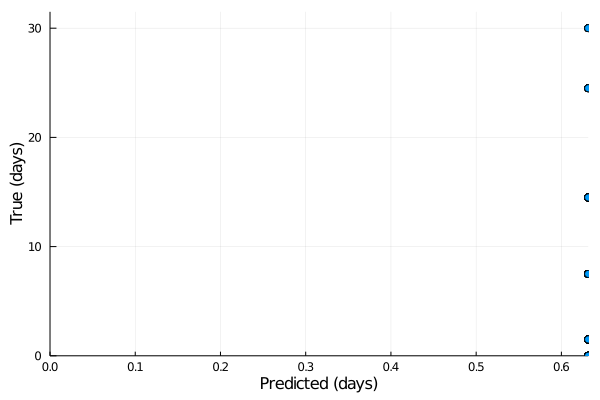

In [876]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [877]:
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), length(cats))
    for i = 1:length(column)
        for j = 1:length(cats)
            if column[i] == cats[j]
                result[i,j] = 1
            end
        end
    end
    result
end

onehot (generic function with 2 methods)

In [878]:
Xtrain = hcat(onehot(train_x1[:sex]), Xtrain)
Xval = hcat(onehot(val_x1[:sex]), Xval)

39928×4 Array{Float64,2}:
 1.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0
 ⋮              
 1.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0

In [879]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

102087.79713971152

Train Eval 		305771.2138751271
Validation Eval 	102087.79713971152


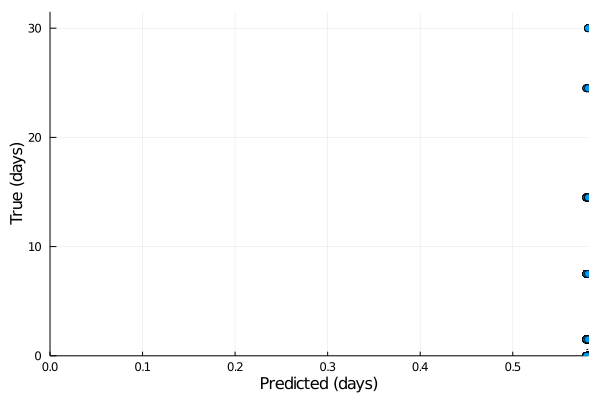

In [880]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [881]:
Xtrain = hcat(onehot(train_x1[:q30], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q30], ["1", "2"]), Xval)

39928×6 Array{Float64,2}:
 0.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  1.0  0.0  0.0  1.0
 0.0  1.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0  1.0
 ⋮                        ⋮
 1.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  1.0  0.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  1.0  0.0  0.0  1.0
 0.0  1.0  1.0  0.0  0.0  1.0

In [882]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

97993.04538583908

Train Eval 		293033.1619550787
Validation Eval 	97993.04538583908


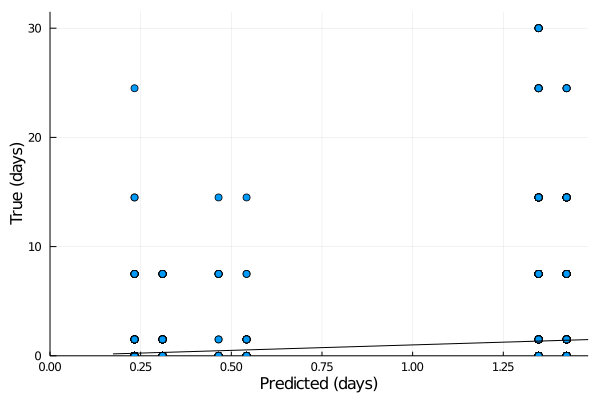

In [883]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [884]:
function q32(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "4"
        elseif df[i] == "4"
            df[i] = "7.5"
        elseif df[i] == "5"
            df[i] = "14.5"
        elseif df[i] == "6"
            df[i] = "24.5"           
        elseif df[i] == "7"
            df[i] = "30"
        end
    end
    df = string_to_float.(df)
    return df
end

q32 (generic function with 1 method)

In [885]:
Xtrain = hcat(q32(train_x1[:q32]), Xtrain)
Xval = hcat(q32(val_x1[:q32]), Xval)

39928×7 Array{Float64,2}:
  0.0  0.0  0.0  1.0  0.0  0.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0
 24.5  0.0  0.0  0.0  1.0  0.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0  1.0  0.0  0.0  1.0  0.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0
  1.5  1.0  0.0  0.0  1.0  0.0  1.0
  0.0  1.0  0.0  0.0  1.0  0.0  1.0
  7.5  1.0  0.0  1.0  0.0  0.0  1.0
  ⋮                        ⋮    
  7.5  1.0  0.0  1.0  0.0  0.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0  1.0  0.0  1.0  0.0  0.0  1.0
  0.0  1.0  0.0  1.0  0.0  0.0  1.0
  0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0
 30.0  1.0  0.0  0.0  1.0  0.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0  1.0  0.0  0.0  1.0  0.0  1.0
  0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0  0.0  1.0  1.0  0.0  0.0  1.0

In [886]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

88627.2218278945

Train Eval 		268918.6809099544
Validation Eval 	88627.2218278945


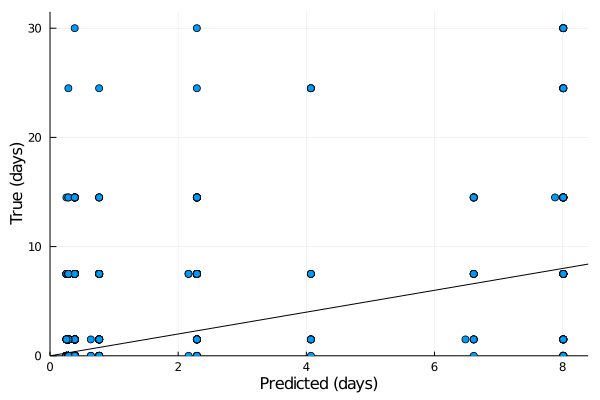

In [887]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [888]:
function q33(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "0.5"
        elseif df[i] == "3"
            df[i] = "1"
        elseif df[i] == "4"
            df[i] = "3.5"
        elseif df[i] == "5"
            df[i] = "8"
        elseif df[i] == "6"
            df[i] = "15.5"           
        elseif df[i] == "7"
            df[i] = "20"
        end
    end
    df = string_to_float.(df)
    return df
end

q33 (generic function with 1 method)

In [889]:
Xtrain = hcat(q33(train_x1[:q33]), Xtrain)
Xval = hcat(q33(val_x1[:q33]), Xval)

39928×8 Array{Float64,2}:
  0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0
  0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0  24.5  0.0  0.0  0.0  1.0  0.0  1.0
  0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
  0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.5   1.5  1.0  0.0  0.0  1.0  0.0  1.0
  0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
  0.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
  ⋮                         ⋮         
  8.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
  0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0   0.0  1.0  0.0  1.0  0.0  0.0  1.0
  0.0   0.0  1.0  0.0  1.0  0.0  0.0  1.0
  0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 15.5  30.0  1.0  0.0  0.0  1.0  0.0  1.0
  0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0   0.0

In [890]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

88526.0529812298

Train Eval 		268587.27055984567
Validation Eval 	88526.0529812298


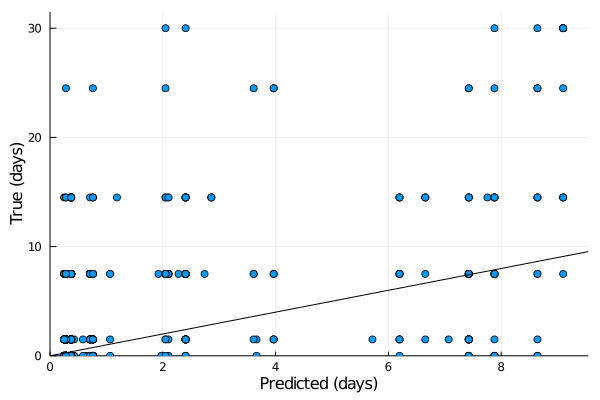

In [891]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [892]:
Xtrain = hcat(onehot(train_x1[:q34], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q34], ["1", "2"]), Xval)

39928×10 Array{Float64,2}:
 0.0  1.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0  24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.5   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
 ⋮                          ⋮                   
 0.0  0.0   8.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 1.0  0.0   0.0   0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0   0.0   0.0  1.0  0.0  1.0  0.

In [893]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

88507.4392064173

Train Eval 		268542.94451939437
Validation Eval 	88507.4392064173


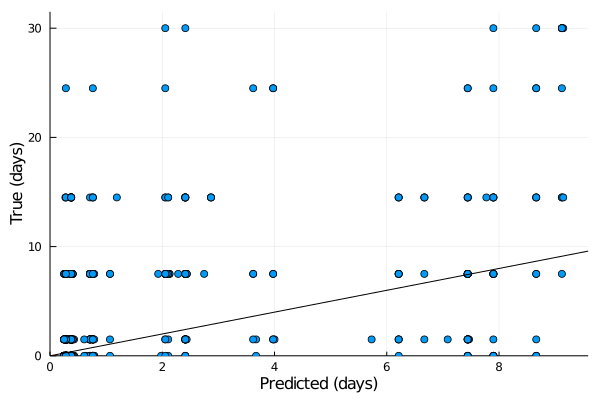

In [894]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [895]:
Xtrain = hcat(q32(train_x1[:q35]), Xtrain)
Xval = hcat(q32(val_x1[:q35]), Xval)

39928×11 Array{Float64,2}:
 0.0  0.0  1.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0  24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  1.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.5   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
 ⋮                          ⋮                        ⋮
 0.0  0.0  0.0   8.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  

In [896]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

88046.05216276

Train Eval 		267281.10733390925
Validation Eval 	88046.05216276


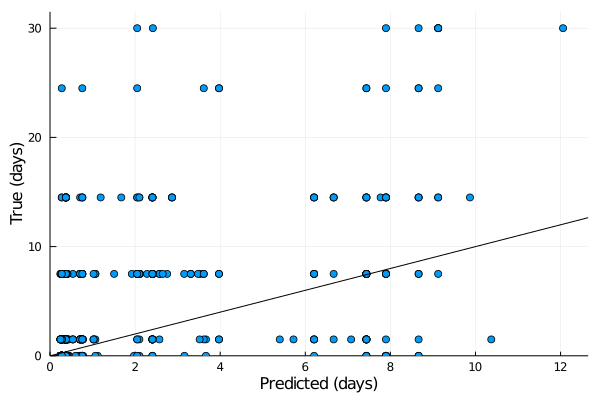

In [897]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [898]:
Xtrain = hcat(q32(train_x1[:q37]), Xtrain)
Xval = hcat(q32(val_x1[:q37]), Xval)

39928×12 Array{Float64,2}:
 0.0  0.0  0.0  1.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0  24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  1.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.5   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
 ⋮                          ⋮                        ⋮    
 0.0  0.0  0.0  0.0   8.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0   0.0   0.0  0.0  1.0  0.0

In [899]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

88014.53830418157

Train Eval 		267255.3976129765
Validation Eval 	88014.53830418157


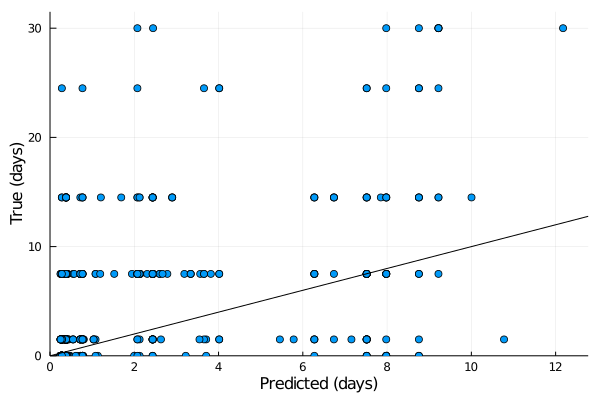

In [900]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [901]:
Xtrain = hcat(q32(train_x1[:q38]), Xtrain)
Xval = hcat(q32(val_x1[:q38]), Xval)

39928×13 Array{Float64,2}:
 0.0  0.0  0.0  0.0  1.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  1.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  1.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.5   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
 7.5  0.0  0.0  0.0  0.0   0.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
 ⋮                         ⋮                         ⋮         
 0.0  0.0  0.0  0.0  0.0   8.0   7.5  

In [902]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

86098.854004975

Train Eval 		262187.35361047
Validation Eval 	86098.854004975


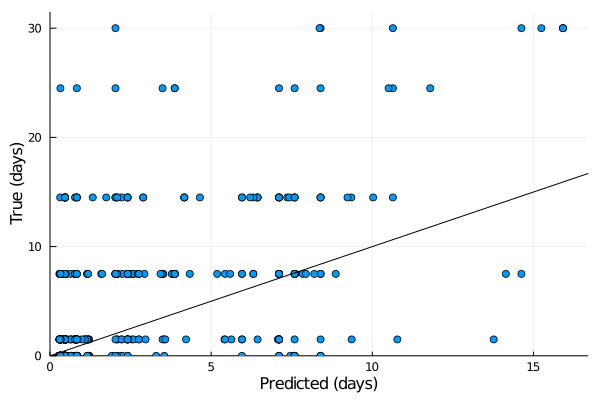

In [903]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [904]:
function q45(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "6"
        elseif df[i] == "4"
            df[i] = "14.5"
        elseif df[i] == "5"
            df[i] = "29.5"
        elseif df[i] == "6"
            df[i] = "69.5"           
        elseif df[i] == "7"
            df[i] = "100"
        end
    end
    df = string_to_float.(df)
    return df
end

q45 (generic function with 1 method)

In [905]:
Xtrain = hcat(q45(train_x1[:q45]), Xtrain)
Xval = hcat(q45(val_x1[:q45]), Xval)

39928×14 Array{Float64,2}:
   0.0  0.0  0.0  0.0  0.0  1.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0  1.0
   1.5  0.0  0.0  0.0  0.0  1.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  1.0  0.0  0.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
  69.5  0.0  0.0  0.0  0.0  0.0   0.0  24.5  0.0  0.0  0.0  1.0  0.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
   0.0  0.0  0.0  0.0  0.0  1.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
   0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0   0.5   1.5  1.0  0.0  0.0  1.0  0.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0
   1.5  7.5  0.0  0.0  0.0  0.0   0.0   7.5  1.0  0.0  1.0  0.0  0.0  1.0
   ⋮       

In [906]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

84758.12513885957

Train Eval 		257612.37275020435
Validation Eval 	84758.12513885957


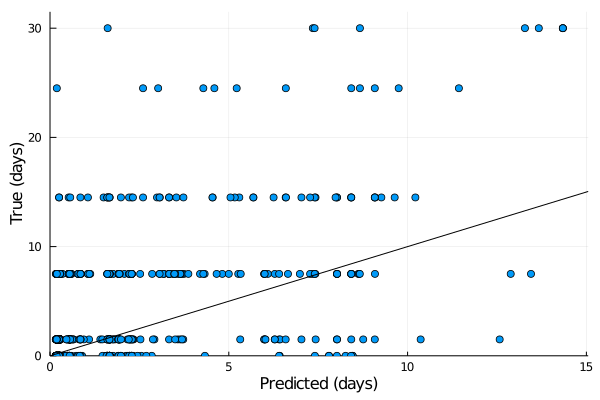

In [907]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [908]:
function q47(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "6"
        elseif df[i] == "4"
            df[i] = "14.5"
        elseif df[i] == "5"
            df[i] = "29.5"
        elseif df[i] == "6"
            df[i] = "40"
        end
    end
    df = string_to_float.(df)
    return df
end

q47 (generic function with 1 method)

In [909]:
Xtrain = hcat(q47(train_x1[:q47]), Xtrain)
Xval = hcat(q47(val_x1[:q47]), Xval)

39928×15 Array{Float64,2}:
  0.0    0.0  0.0  0.0  0.0  0.0  1.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
  1.5    1.5  0.0  0.0  0.0  0.0  1.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  0.0  0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 14.5   69.5  0.0  0.0  0.0  0.0  0.0     24.5  0.0  0.0  0.0  1.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  0.0  1.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  1.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  0.0  0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
  0.0    0.0  0.0  0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
  0.0    1.5  7.5  0.0  0.0  0.0  0.0      7.5  1

In [910]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

84056.73837034321

Train Eval 		254840.9775241746
Validation Eval 	84056.73837034321


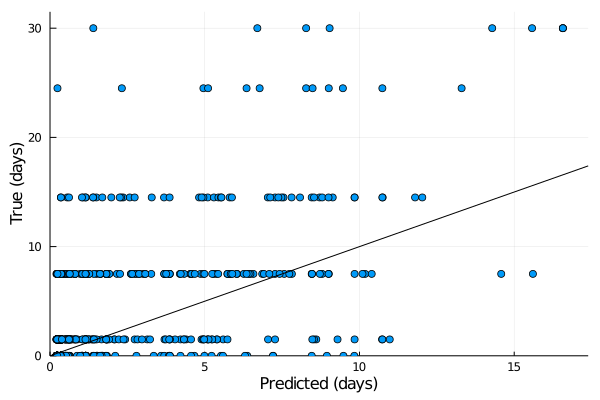

In [911]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [912]:
Xtrain = hcat(q47(train_x1[:q48]), Xtrain)
Xval = hcat(q47(val_x1[:q48]), Xval)

39928×16 Array{Float64,2}:
 0.0   0.0    0.0  0.0  0.0  0.0  0.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0   1.5    1.5  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  14.5   69.5  0.0  0.0  0.0  0.0     24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  1.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0   0.0    0.0  0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0   0.0    1.5  7.5  0.0  0.0  0.0      7.5  1

In [913]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

84045.07946479827

Train Eval 		254835.9083680379
Validation Eval 	84045.07946479827


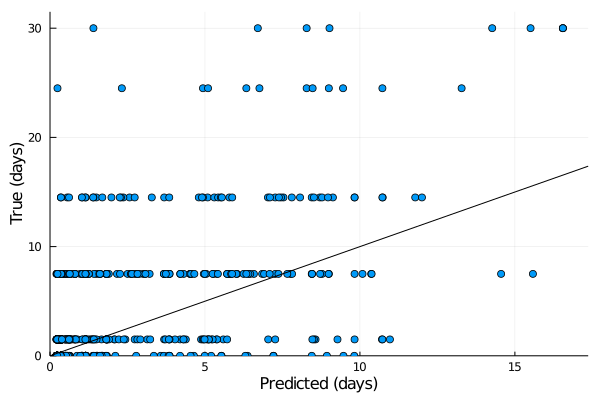

In [914]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [915]:
Xtrain = hcat(q47(train_x1[:q50]), Xtrain)
Xval = hcat(q47(val_x1[:q50]), Xval)

39928×17 Array{Float64,2}:
 0.0  0.0   0.0    0.0  0.0  0.0  0.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0   1.5    1.5  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  14.5   69.5  0.0  0.0  0.0     24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0    0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0   0.0    1.5  7.5  0.0  0.0      7.5  1

In [916]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

82997.58918168079

Train Eval 		252104.77160152618
Validation Eval 	82997.58918168079


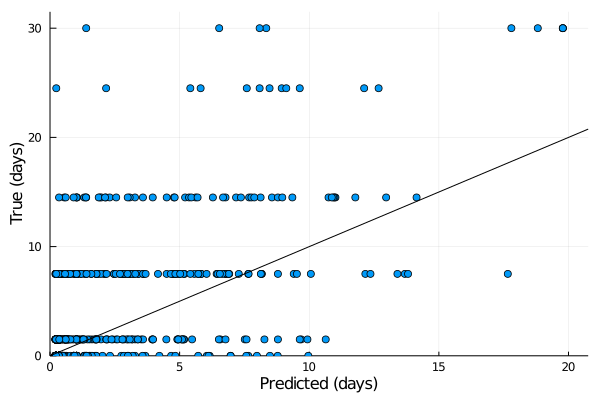

In [917]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [918]:
Xtrain = hcat(q47(train_x1[:q51]), Xtrain)
Xval = hcat(q47(val_x1[:q51]), Xval)

39928×18 Array{Float64,2}:
 0.0  0.0  0.0   0.0    0.0  0.0  0.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0   1.5    1.5  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0    0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 1.5  0.0  0.0   0.0    0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0   0.0    0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0    0.0  0.0  0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  14.5   69.5  0.0  0.0     24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0    0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0    0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0    0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0    0.0  0.0  0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0    0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0   0.0    1.5  7.5  0.0      7.5  1

In [919]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

82961.88878994931

Train Eval 		251909.36561907892
Validation Eval 	82961.88878994931


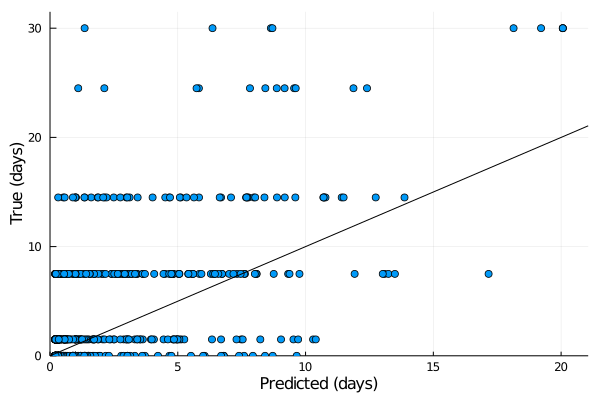

In [920]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [921]:
Xtrain = hcat(q47(train_x1[:q52]), Xtrain)
Xval = hcat(q47(val_x1[:q52]), Xval)

39928×19 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0    0.0  0.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0   1.5    1.5  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  1.5  0.0  0.0   0.0    0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    0.0  0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  14.5   69.5  0.0     24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    0.0  0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0   0.0    1.5  7.5      7.5  1

In [922]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

82674.7724935672

Train Eval 		251023.49003610184
Validation Eval 	82674.7724935672


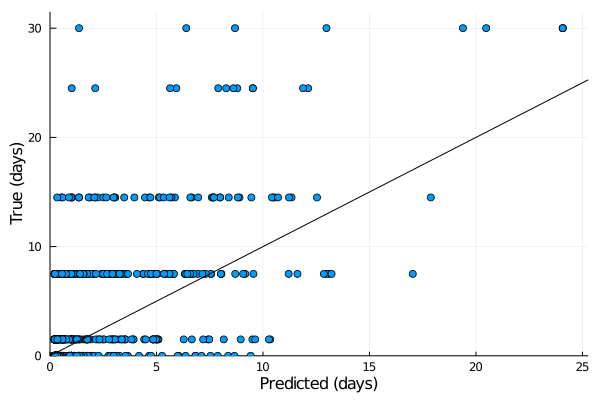

In [923]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [924]:
Xtrain = hcat(q47(train_x1[:q54]), Xtrain)
Xval = hcat(q47(val_x1[:q54]), Xval)

39928×20 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0   0.0    0.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   1.5    1.5      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.5  0.0  0.0   0.0    0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  14.5   69.5     24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0    1.5      7.5  1

In [925]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

82794.73946067432

Train Eval 		251435.95984386548
Validation Eval 	82794.73946067432


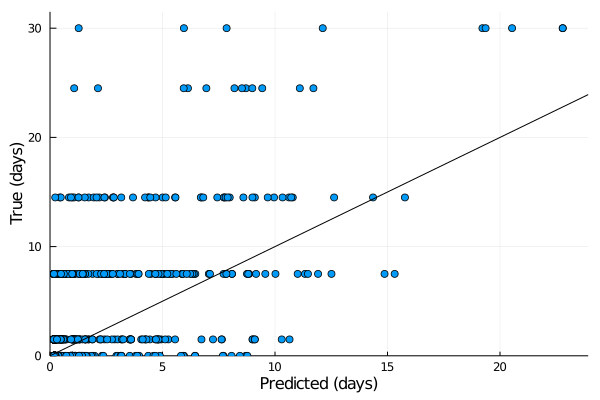

In [926]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [927]:
Xtrain = hcat(q47(train_x1[:q55]), Xtrain)
Xval = hcat(q47(val_x1[:q55]), Xval)

39928×21 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0   0.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   1.5      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.5  0.0  0.0   0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  14.5     24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0      7.5  1.0  0.0  1.0  0.0  0.0  1.

In [928]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

82518.97995066684

Train Eval 		250721.4708206589
Validation Eval 	82518.97995066684


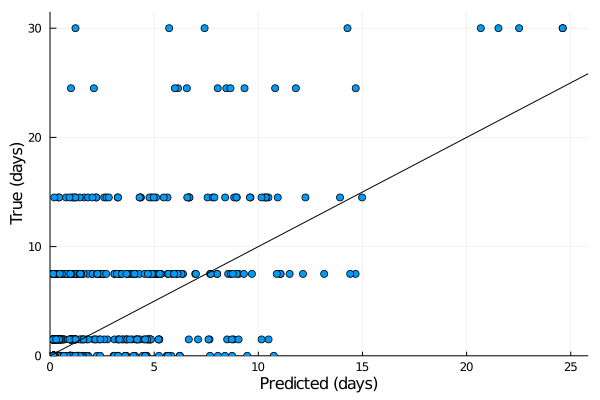

In [929]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [930]:
Xtrain = hcat(onehot(train_x1[:q58], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q58], ["1", "2"]), Xval)

39928×23 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.5  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     24.5  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0      7.5  1.0  0.0  1.0  0.0  0.0  1.0
 ⋮         

In [931]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

82068.72830424125

Train Eval 		249611.592462791
Validation Eval 	82068.72830424125


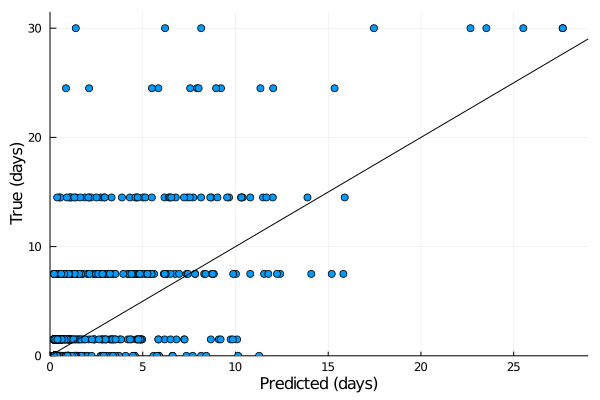

In [932]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)

In [933]:
function q77(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1"
        elseif df[i] == "3"
            df[i] = "2"
        elseif df[i] == "4"
            df[i] = "3"
        elseif df[i] == "5"
            df[i] = "4"
        elseif df[i] == "6"
            df[i] = "5"           
        elseif df[i] == "7"
            df[i] = "6"
        elseif df[i] == "8"
            df[i] = "7"
        end
    end
    df = string_to_float.(df)
    return df
end

q77 (generic function with 1 method)

In [934]:
Xtrain = hcat(q77(train_x1[:q77]), Xtrain)
Xval = hcat(q77(val_x1[:q77]), Xval)

39928×24 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.5      0.0  0.0  1.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  …   0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0     24.5  0.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  …   1.5  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  1.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0      7.5  1.0  0.0  1.0  0.0  0.0  1.0
 ⋮         

In [935]:
w = proxgrad(HuberLoss(), ZeroReg(), Xtrain, train_y1, maxiters=200)
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'

train_eval = evaluate(HuberLoss(), train_pred, train_y1)
val_eval = evaluate(HuberLoss(), val_pred, val_y1)

82070.301867932

Train Eval 		249616.04886567706
Validation Eval 	82070.301867932


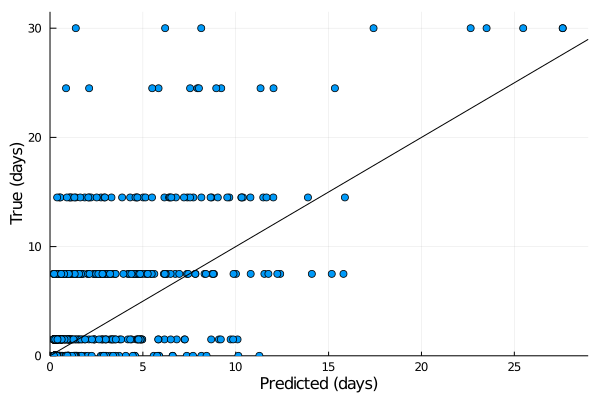

In [936]:
println("Train Eval \t\t", train_eval)
println("Validation Eval \t", val_eval)

plot_pred_true(val_pred, val_y1)